In [2]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Scenario 1

In [89]:
#scenario 1
t, p = proportions_ztest(28, 94, 0.16)
t, p

(2.9229268377264077, 0.0034675798365736213)

# Scenario 2

In [7]:
#scenario 2
df2 = pd.read_csv("L10_2.csv")
df2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)
df2_expanded = df2.copy()

In [11]:
df2_pivot = pd.pivot_table(df2,index='AS',columns='Clinic',values="Count")
df2_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [9]:
for i in df2.index:
    df2_expanded = df2_expanded.append([df2.iloc[i,:]]*(df2.iloc[i,2]-1),ignore_index=True)

In [10]:
df2_expanded.tail()

,Clinic,AS,Count
979,3,D,182
980,3,D,182
981,3,D,182
982,3,D,182
983,3,D,182


In [96]:
df2_crosstab = pd.crosstab(df2_expanded['Clinic'], df2_expanded['AS']).transpose()
df2_crosstab

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [97]:
stats.chi2_contingency(df2_crosstab)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

In [12]:
stats.chi2_contingency(df2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

# Scenario 3

In [10]:
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [4]:
df3 = pd.read_csv("L10_3.csv")
df3.head()

,Group A,Group B,Group C,Group D
0,"$21,383.06","$17,077.54","$13,636.38","$14,582.73"
1,"$19,729.92","$17,258.06","$5,156.36","$12,880.28"
2,"$24,071.53","$20,652.91","$4,446.92","$16,412.72"
3,"$19,056.28","$20,845.06","$4,892.59","$14,020.00"
4,"$19,147.18","$22,296.64","$14,099.38","$16,467.70"


In [5]:
df3 = df3.replace(["\$",","] , ["", ""], regex=True).astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
Group A    51 non-null float64
Group B    47 non-null float64
Group C    55 non-null float64
Group D    58 non-null float64
dtypes: float64(4)
memory usage: 1.9 KB


In [9]:
df3_expanded=pd.melt(df3,var_name='Group', value_name='$')

In [12]:
df3_expanded = df3_expanded.replace(df3.columns, [0,1,2,3])

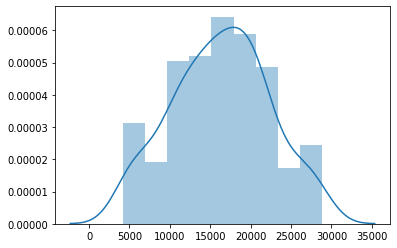

In [29]:
sns.distplot(df3.values[~np.isnan(df3.values)])

In [30]:
scipy.stats.bartlett(df3_expanded['$'], df3_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [32]:
scipy.stats.fligner(df3_expanded['$'], df3_expanded['Group'])

FlignerResult(statistic=292.8661128532466, pvalue=1.1805018303420083e-65)

In [100]:
data = [df3[col].dropna() for col in df3]

In [101]:
stats.f_oneway(*data)

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

# Scenario 4

In [3]:
#scenario 4
t, p = proportions_ztest([374, 171], [374+129, 171+74])
t, p

(1.3156546893290748, 0.18828996870412507)